In [52]:
import tensorflow as tf
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk import ngrams

from numpy import asarray
from numpy import zeros
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from sklearn import metrics 
from sklearn.metrics import *


from tensorflow.keras.utils import plot_model
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import text_to_word_sequence
from sklearn.feature_extraction.text import TfidfVectorizer
from keras import models
from keras import layers
from tensorflow.keras.layers import GRU, Embedding, Dense, Activation, BatchNormalization, concatenate, Input, Dropout, Bidirectional, Flatten,Conv1D, GlobalMaxPooling1D, MaxPooling1D, LSTM
from keras.layers import Activation, Conv2D, Input, Embedding, Reshape, MaxPool2D, Concatenate, Flatten, Dropout, Dense, Conv1D
from tensorflow.keras.models import Sequential,Model
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from sklearn.utils import shuffle
import gensim
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelBinarizer 
import string
from nltk.stem.isri import ISRIStemmer
import nltk
# nltk.download('punkt')
from nltk import word_tokenize


from keras.preprocessing.text import one_hot 
from keras.layers.embeddings import Embedding
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
# import keras
import random
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint


# text preprossing 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.pipeline import Pipeline ,make_pipeline
from keras.preprocessing.text import Tokenizer

from collections import Counter 

# classifiers 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [53]:
df=pd.read_csv('../input/dialect/dialect_tweets.csv')

In [54]:
df

,Unnamed: 0,id,dialect,tweets
0,0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي
3,3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺
...,...,...,...,...
458192,458192,1019484980282580992,BH,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅
458193,458193,1021083283709407232,BH,@Zzainabali @P_ameerah والله ماينده ابش يختي
458194,458194,1017477537889431552,BH,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...
458195,458195,1022430374696239232,BH,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋


In [55]:
df=df.drop(labels='Unnamed: 0', axis=1)
df['dialect'] = df['dialect'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   id       458197 non-null  int64   
 1   dialect  458197 non-null  category
 2   tweets   458197 non-null  object  
dtypes: category(1), int64(1), object(1)
memory usage: 7.4+ MB


In [56]:
arb_stopwords_set = set(nltk.corpus.stopwords.words("arabic"))
arb_stopwords_lst=list(arb_stopwords_set)
len(arb_stopwords_lst)

701

In [57]:
def data_cleaning (text):
    text= re.sub(r"@\S+", '', text )
    text=re.sub(r"htt\S+", '', text )
    text=re.sub(r'ه{3,}','ههه', text )
    text=re.sub(r"[a-zA-Z]+", ' ', text )

    text=re.sub(r"\n+", ' ', text )
    text=re.sub(r"[-+*><&%$#=@/^/[/|\]/{}()!\\?؟'\"،:~;.,_÷]+", ' ', text )
    text=re.sub(r"\d+", ' ', text )
    text=re.sub(r"[.]+", ' ', text )
    
    

    EMOJI_PATTERN = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

    text=EMOJI_PATTERN.sub( r'', text )
    
#     stop = re.compile(r'\b(' + r'|'.join(arb_stopwords_lst) + r')\b\s*')
#     text = stop.sub('', text)

    text=re.sub(r" {2,}", ' ', text )
    text=re.sub(r"^ +", '', text )
    text=re.sub(r" +$", '', text )

    return text

In [58]:
df['tweets']=df['tweets'].apply(data_cleaning)
df

,id,dialect,tweets
0,1175358310087892992,IQ,لكن بالنهاية ينتفض يغير
1,1175416117793349632,IQ,يعني هذا محسوب على البشر حيونه ووحشيه وتطلبون ...
2,1175450108898565888,IQ,مبين من كلامه خليجي
3,1175471073770573824,IQ,يسلملي مرورك وروحك الحلوه
4,1175496913145217024,IQ,وين هل الغيبه اخ محمد
...,...,...,...
458192,1019484980282580992,BH,مبسوطين منك اللي باسطانا
458193,1021083283709407232,BH,والله ماينده ابش يختي
458194,1017477537889431552,BH,شو عملنا لك حنا تهربي مننا احنا مساكين ليش بتع...
458195,1022430374696239232,BH,الله يبارك فيها وبالعافيه


In [59]:
df = shuffle(df)
df

,id,dialect,tweets
40997,854822533597626368,LY,انا نسأل فيك عن رأيك
219480,990195426677743616,YE,سنين مرت وحبكم ما زال في
279907,1156009700892147712,EG,والله لو شوفت اسرائيل بتضرب عليهم نووي ولا في ...
378524,996657825064587264,OM,طالعي بذمتك شو من الحلا فهذا
209658,1159511604205146112,SA,افزع لك وين يرحم امك جاتني كتمه من الي تفكر في...
...,...,...,...
89421,1176243171052937216,PL,ماشفتو لعيبة يتزحلقو كتير
429761,984710072583548800,AE,تردد قناة زي ألوان علي عرب سات ونايل سات للأفل...
2299,750227507010473984,IQ,الان بامكانك ان تاكل خره وتصمت
426182,1106144450995212416,AE,حسيت بأن هالقعدة ناقصتنها الي ف الصورة


# EDA

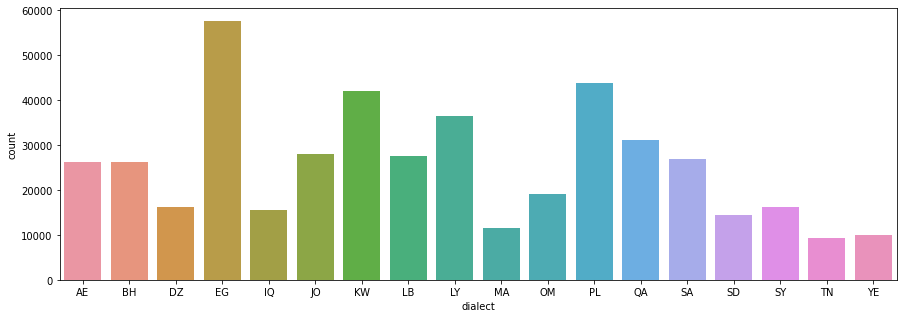

In [60]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df , x="dialect")

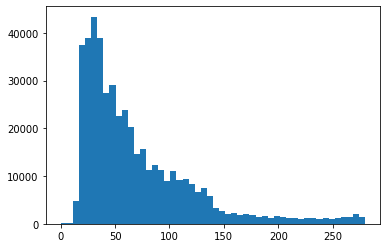

In [61]:
# number of words in tweets
plt.hist([len(s) for s in df['tweets']], bins=50)
plt.show()

gonna choose max number of words to be 50 to reduce computations ,
50 words should be enough for this problem

**top 10 words for each dialect :**

In [62]:
unique_classes=list(df['dialect'].unique())
unique_classes

for i in unique_classes:
    df1=df.loc[df["dialect"]==i]
    print(f'top 15 words for {i}')
    print(Counter(" ".join(df1["tweets"]).split()).most_common(15) ,'\n')

top 15 words for LY
[('في', 10080), ('من', 7833), ('اللي', 5966), ('و', 5663), ('مش', 4054), ('ما', 3648), ('الله', 3385), ('يا', 3124), ('بس', 2959), ('ههه', 2299), ('علي', 2201), ('على', 2137), ('كل', 1870), ('انا', 1856), ('والله', 1742)] 

top 15 words for YE
[('من', 2206), ('في', 1186), ('اللي', 1107), ('الله', 1040), ('ما', 1029), ('على', 1014), ('بس', 756), ('يا', 754), ('و', 733), ('ههه', 659), ('كل', 591), ('ولا', 523), ('لا', 518), ('مش', 471), ('انا', 455)] 

top 15 words for EG
[('من', 12240), ('مش', 10970), ('في', 10475), ('اللي', 9634), ('يا', 8872), ('ده', 8526), ('و', 8277), ('بس', 6284), ('على', 5692), ('انا', 5649), ('ولا', 4692), ('ايه', 4656), ('فى', 4654), ('كل', 4540), ('ما', 4523)] 

top 15 words for OM
[('ما', 4924), ('من', 4114), ('اللي', 2686), ('في', 2075), ('الله', 2044), ('بس', 1557), ('و', 1447), ('على', 1444), ('شي', 1331), ('كل', 1252), ('م', 1111), ('لا', 1080), ('يا', 1035), ('ف', 967), ('ولا', 959)] 

top 15 words for SA
[('من', 6768), ('اللي', 4904),

spliting data

In [63]:
X=df.tweets
y=df.dialect
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=10)

In [64]:
# def remove_stop_w(text):
#     stop = re.compile(r'\b(' + r'|'.join(arb_stopwords_lst) + r')\b\s*')
#     text = stop.sub('', text)
#     return text

# # X_test=remove_stop_w(X_test)
# X_test=X_test.apply(remove_stop_w)

# ML-model (LinearSVC)

In [65]:
tf=TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 5),max_df=0.5,min_df=20)
clf=LinearSVC()#class_weight='balanced'


pipeline = make_pipeline(tf,clf)

In [66]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='char_wb', max_df=0.5, min_df=20,
                                 ngram_range=(2, 5))),
                ('linearsvc', LinearSVC())])

In [67]:
y_pred = pipeline.predict(X_test)

In [68]:
print(metrics.classification_report(y_test,y_pred))
print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_test,y_pred)))

              precision    recall  f1-score   support

          AE       0.46      0.44      0.45      5259
          BH       0.42      0.36      0.39      5258
          DZ       0.65      0.58      0.61      3237
          EG       0.74      0.88      0.80     11527
          IQ       0.64      0.59      0.61      3099
          JO       0.47      0.38      0.42      5584
          KW       0.52      0.61      0.56      8422
          LB       0.63      0.70      0.66      5524
          LY       0.68      0.73      0.70      7300
          MA       0.76      0.65      0.70      2308
          OM       0.47      0.41      0.44      3823
          PL       0.52      0.58      0.55      8749
          QA       0.50      0.50      0.50      6214
          SA       0.44      0.47      0.46      5367
          SD       0.71      0.62      0.66      2887
          SY       0.50      0.34      0.41      3248
          TN       0.70      0.48      0.57      1849
          YE       0.43    

# preparing data for deep learning

In [69]:
# initialize Tokenizer to encode strings into integers
tokenizer = Tokenizer()

# calculate number of rows in our dataset
# num_rows = df_train.shape[0]

# create vocabulary from all words in our dataset for encoding
tokenizer.fit_on_texts(X_train)

# max length of 1 row (number of words)
row_max_length = 50

# count number of unique words
vocabulary_size = len(tokenizer.word_index) + 1

# convert words into integers
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)
# X_sub_tokens = tokenizer.texts_to_sequences(df_submission['Phrase'].values)

# ensure every row has same size - pad missing with zeros
X_train_pad = pad_sequences(X_train_tokens, maxlen=row_max_length, padding='post')
X_test_pad = pad_sequences(X_test_tokens, maxlen=row_max_length, padding='post')
# X_sub_pad = pad_sequences(X_sub_tokens, maxlen=row_max_length, padding='post')

print(X_train_pad.shape,X_test_pad.shape)

(366557, 50) (91640, 50)


In [70]:
encoder = LabelEncoder()
y_encoded_tr = encoder.fit_transform(y_train)
y_encoded_tr = to_categorical(y_encoded_tr)
y_encoded_ts = encoder.transform(y_test)
y_encoded_ts = to_categorical(y_encoded_ts)
print(y_encoded_tr.shape,y_encoded_ts.shape)

(366557, 18) (91640, 18)


# **CNN**

In [71]:
EMBEDDING_DIM = 512
# row_max_length = 50
filter_sizes=[2,3,4,5]
embedding_dim=512
num_filters=512
MAX_SEQUENCE_LENGTH =50

In [72]:
embedding_layer = Embedding(vocabulary_size, EMBEDDING_DIM, input_length=row_max_length,trainable=True)
inputs = Input(shape=(row_max_length,), dtype='int32')
embedding = embedding_layer(inputs)

print(embedding.shape)
reshape = Reshape((row_max_length,EMBEDDING_DIM,1))(embedding)
print(reshape.shape)

conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_3 = Conv2D(num_filters, kernel_size=(filter_sizes[3], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)

maxpool_0 = MaxPool2D(pool_size=(MAX_SEQUENCE_LENGTH - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(conv_0)
maxpool_1 = MaxPool2D(pool_size=(MAX_SEQUENCE_LENGTH - filter_sizes[1] + 1, 1), strides=(1,1), padding='valid')(conv_1)
maxpool_2 = MaxPool2D(pool_size=(MAX_SEQUENCE_LENGTH - filter_sizes[2] + 1, 1), strides=(1,1), padding='valid')(conv_2)
maxpool_3 = MaxPool2D(pool_size=(MAX_SEQUENCE_LENGTH - filter_sizes[3] + 1, 1), strides=(1,1), padding='valid')(conv_3)

concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2,maxpool_3])
flatten = Flatten()(concatenated_tensor)

dropout = Dropout(.5)(flatten)
den = Dense(1024, activation='relu')(dropout)
dropout_2 = Dropout(.2)(den)
output = Dense(len(encoder.classes_), activation='softmax')(dropout_2)

# this creates a model that includes
model = Model(inputs=inputs, outputs=output)

checkpoint = ModelCheckpoint('weights_cnn_sentece.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')#monitor='val_accuracy'
# adam = Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

(None, 50, 512)
(None, 50, 512, 1)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 50, 512)      230537728   input_3[0][0]                    
__________________________________________________________________________________________________
reshape_2 (Reshape)             (None, 50, 512, 1)   0           embedding_3[0][0]                
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 49, 1, 512)   524800      reshape_2[0][0]                  
_________________________________________________________

In [73]:
Cnn_1st=model.fit(X_train_pad, y_encoded_tr, validation_split = .1,epochs=6, batch_size=64,callbacks=[checkpoint])

Epoch 1/6
5155/5155 [==============================] - 425s 82ms/step - loss: 1.7701 - accuracy: 0.4507 - val_loss: 1.5395 - val_accuracy: 0.5213

Epoch 00001: val_loss improved from inf to 1.53946, saving model to weights_cnn_sentece.hdf5


2022-03-17 10:15:57.536878: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 922150912 exceeds 10% of free system memory.
2022-03-17 10:15:59.458052: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 922150912 exceeds 10% of free system memory.


Epoch 2/6
5155/5155 [==============================] - 424s 82ms/step - loss: 1.0978 - accuracy: 0.6626 - val_loss: 1.5923 - val_accuracy: 0.5281

Epoch 00002: val_loss did not improve from 1.53946
Epoch 3/6
5155/5155 [==============================] - 424s 82ms/step - loss: 0.6270 - accuracy: 0.8075 - val_loss: 1.9477 - val_accuracy: 0.5090

Epoch 00003: val_loss did not improve from 1.53946
Epoch 4/6
5155/5155 [==============================] - 423s 82ms/step - loss: 0.3988 - accuracy: 0.8785 - val_loss: 2.4195 - val_accuracy: 0.5021

Epoch 00004: val_loss did not improve from 1.53946
Epoch 5/6
5155/5155 [==============================] - 424s 82ms/step - loss: 0.2967 - accuracy: 0.9104 - val_loss: 2.7596 - val_accuracy: 0.4976

Epoch 00005: val_loss did not improve from 1.53946
Epoch 6/6
5155/5155 [==============================] - 424s 82ms/step - loss: 0.2442 - accuracy: 0.9282 - val_loss: 3.0614 - val_accuracy: 0.4914

Epoch 00006: val_loss did not improve from 1.53946


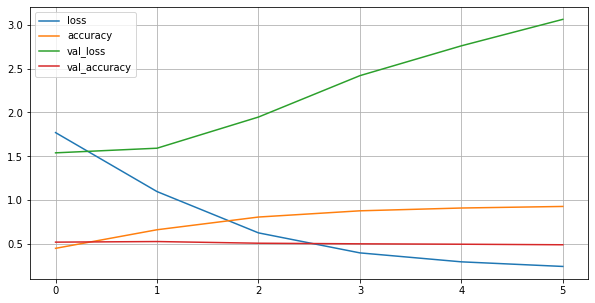

In [74]:

learning_data = pd.DataFrame(Cnn_1st.history)
# learning_data.head()
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

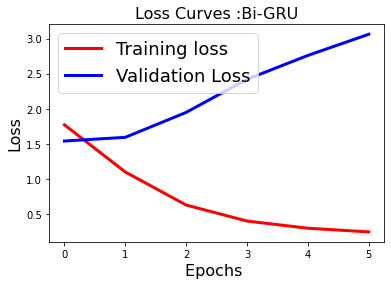

In [75]:
fig1 = plt.figure()
plt.plot(Cnn_1st.history['loss'],'r',linewidth=3.0)
plt.plot(Cnn_1st.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :Bi-GRU',fontsize=16)
plt.show()

In [76]:
model.evaluate(X_test_pad, y_encoded_ts)

2864/2864 [==============================] - 19s 7ms/step - loss: 3.0605 - accuracy: 0.4916


[3.0604758262634277, 0.49159756302833557]

In [77]:
y_pred = np.round(model.predict(X_test_pad))#np.round

In [78]:
print(classification_report(y_encoded_ts,y_pred,target_names=encoder.classes_))
print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_encoded_ts, y_pred)))
# print("accuracy: {:0.3f}".format(metrics.f1_score(y_encoded_ts, y_pred)))


              precision    recall  f1-score   support

          AE       0.41      0.35      0.38      5259
          BH       0.36      0.32      0.34      5258
          DZ       0.68      0.43      0.53      3237
          EG       0.77      0.75      0.76     11527
          IQ       0.64      0.43      0.51      3099
          JO       0.45      0.26      0.33      5584
          KW       0.53      0.45      0.48      8422
          LB       0.65      0.56      0.60      5524
          LY       0.76      0.56      0.65      7300
          MA       0.78      0.56      0.65      2308
          OM       0.42      0.28      0.34      3823
          PL       0.52      0.45      0.48      8749
          QA       0.50      0.38      0.43      6214
          SA       0.43      0.30      0.36      5367
          SD       0.68      0.49      0.57      2887
          SY       0.40      0.28      0.33      3248
          TN       0.70      0.40      0.51      1849
          YE       0.31    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# GRU

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GRU, Dropout, Bidirectional, SpatialDropout1D
from tensorflow.keras.utils import to_categorical

In [80]:
EMBEDDING_DIM = 512

model1 = Sequential()
model1.add(Embedding(vocabulary_size, EMBEDDING_DIM, input_length=row_max_length))
model1.add(SpatialDropout1D(0.2))
model1.add(Bidirectional(GRU(128)))
model1.add(Dense(128, activation='tanh'))
model1.add(Dropout(0.2))
model1.add(Dense(len(encoder.classes_), activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
history = model1.fit(X_train_pad, y_encoded_tr, epochs=8,validation_split = 0.1, batch_size=128, callbacks=[callback])#save_best_only=True ,monitor='val_accuracy'

Epoch 1/8
2578/2578 [==============================] - 186s 71ms/step - loss: 1.7330 - accuracy: 0.4569 - val_loss: 1.4626 - val_accuracy: 0.5472
Epoch 2/8
2578/2578 [==============================] - 181s 70ms/step - loss: 0.8559 - accuracy: 0.7394 - val_loss: 1.6245 - val_accuracy: 0.5297
Epoch 3/8
2578/2578 [==============================] - 182s 71ms/step - loss: 0.3607 - accuracy: 0.8902 - val_loss: 1.9820 - val_accuracy: 0.5117
Epoch 4/8
2578/2578 [==============================] - 181s 70ms/step - loss: 0.2082 - accuracy: 0.9360 - val_loss: 2.3965 - val_accuracy: 0.4965
Epoch 5/8
2578/2578 [==============================] - 182s 70ms/step - loss: 0.1402 - accuracy: 0.9568 - val_loss: 2.6440 - val_accuracy: 0.4912


In [81]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 512)           230537728 
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 512)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               493056    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 18)                2322      
Total params: 231,066,002
Trainable params: 231,066,002
Non-trainable params: 0
________________________________________

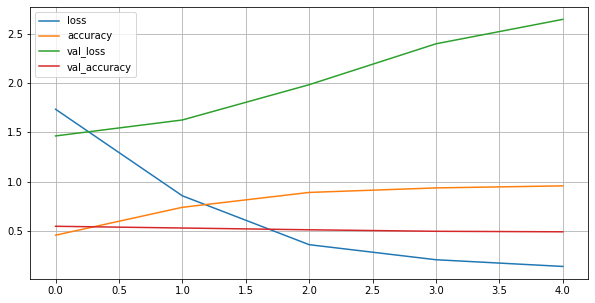

In [82]:
learning_data = pd.DataFrame(history.history)
# learning_data.head()
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

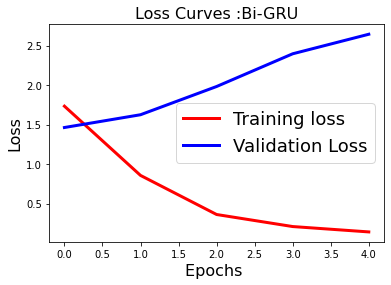

In [83]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :Bi-GRU',fontsize=16)
plt.show()

In [84]:
model1.evaluate(X_test_pad, y_encoded_ts)

2864/2864 [==============================] - 17s 6ms/step - loss: 2.6255 - accuracy: 0.4905


[2.625537157058716, 0.49047359824180603]

In [85]:
y_pred = np.round(model1.predict(X_test_pad))


In [86]:
print(classification_report(y_encoded_ts,y_pred,target_names=encoder.classes_))
print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_encoded_ts, y_pred)))
# print("accuracy: {:0.3f}".format(metrics.f1_score(y_encoded_ts, y_pred)))

              precision    recall  f1-score   support

          AE       0.37      0.35      0.36      5259
          BH       0.38      0.28      0.32      5258
          DZ       0.55      0.49      0.52      3237
          EG       0.74      0.77      0.76     11527
          IQ       0.63      0.43      0.51      3099
          JO       0.40      0.33      0.36      5584
          KW       0.51      0.46      0.48      8422
          LB       0.66      0.55      0.60      5524
          LY       0.72      0.60      0.65      7300
          MA       0.76      0.55      0.64      2308
          OM       0.36      0.33      0.34      3823
          PL       0.50      0.45      0.47      8749
          QA       0.45      0.42      0.43      6214
          SA       0.39      0.36      0.37      5367
          SD       0.69      0.49      0.57      2887
          SY       0.38      0.30      0.34      3248
          TN       0.53      0.45      0.49      1849
          YE       0.28    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


conclusion :

savinvg svc model as it had best results

In [97]:
import pickle

In [98]:
# save the model to disk
filename = 'svc_pipe_model.sav'
pickle.dump(pipeline, open(filename, 'wb'))

testing the model :

In [100]:
def predict_dialect(text):
    cl_text=data_cleaning(text)
    txt_lst=[cl_text,]
    pred=pipeline.predict(txt_lst)
    print(f'Predicted dialect fot {text} is {pred}' )
    
    
tst_lst = ['وأنت عامل ايه دلوقتي ؟','هلا ولله !','ايشلونك ؟']
for i in tst_lst:
    predict_dialect(i)


Predicted dialect fot وأنت عامل ايه دلوقتي ؟ is ['EG']
Predicted dialect fot هلا ولله ! is ['LY']
Predicted dialect fot ايشلونك ؟ is ['IQ']
